# Social Network Analysis Project: Report 1
# Exploring the *Titanic* dataset

## Introduction - *Unveiling Titanic's Social Fabric: A Network Analysis*

### Group F members
The minds behind this journey are: **Leonardo Azzi**, **Sofia Bruni**, **Francesca Romana Sanna**, **Alexandra Tabarani** and **Marta Torella**, five students of the Bachelor in Management and Computer Science.

Throughout the course weeks, we aim to not only visually represent these connections but also analyze them through various graph metrics.

In our project, the **characters** aboard the Titanic take center stage as *nodes*, while the *edges* connecting them represent **shared scenes**, their *weights* reflecting the **frequency** of these shared appearences.
This analytical approach allows us to decode the complex web of interactions that shaped the destinies of the movie characters.

Through meticulous examination, we will be able to uncover the characters as well as the patterns of connection that lie underneath the narrative.

*Join us as we sail through the Titanic's data!*

### Imports
We start by importing the necessary libraries for our analysis.

In [1]:
# Basic Imports with aliases
import numpy as np 
import matplotlib.pyplot as plt
import csv
import networkx as nx

### Loading the **Graph** from the given CSV files

In [2]:
G = nx.Graph() # Create a graph

# Read nodes from *nodes.csv* file
with open('../Graph/nodes.csv', 'r') as file:       # Open the CSV file
    reader = csv.DictReader(file)                   # DictReader is a class that reads a CSV file and converts it into a dictionary
    for row in reader:                              # Iterate over the rows of the CSV file, each row is a dictionary
        G.add_node(row['Id'], label=row['Label'])   # Add a node to the graph with the node id and label

# Read edges from *edges.csv* file
with open('../Graph/edges.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        G.add_edge(row['Source'], row['Target'], weight=int(row['Weight'])) # Add an edge to the graph with the source, target and weight


### Plotting the graph

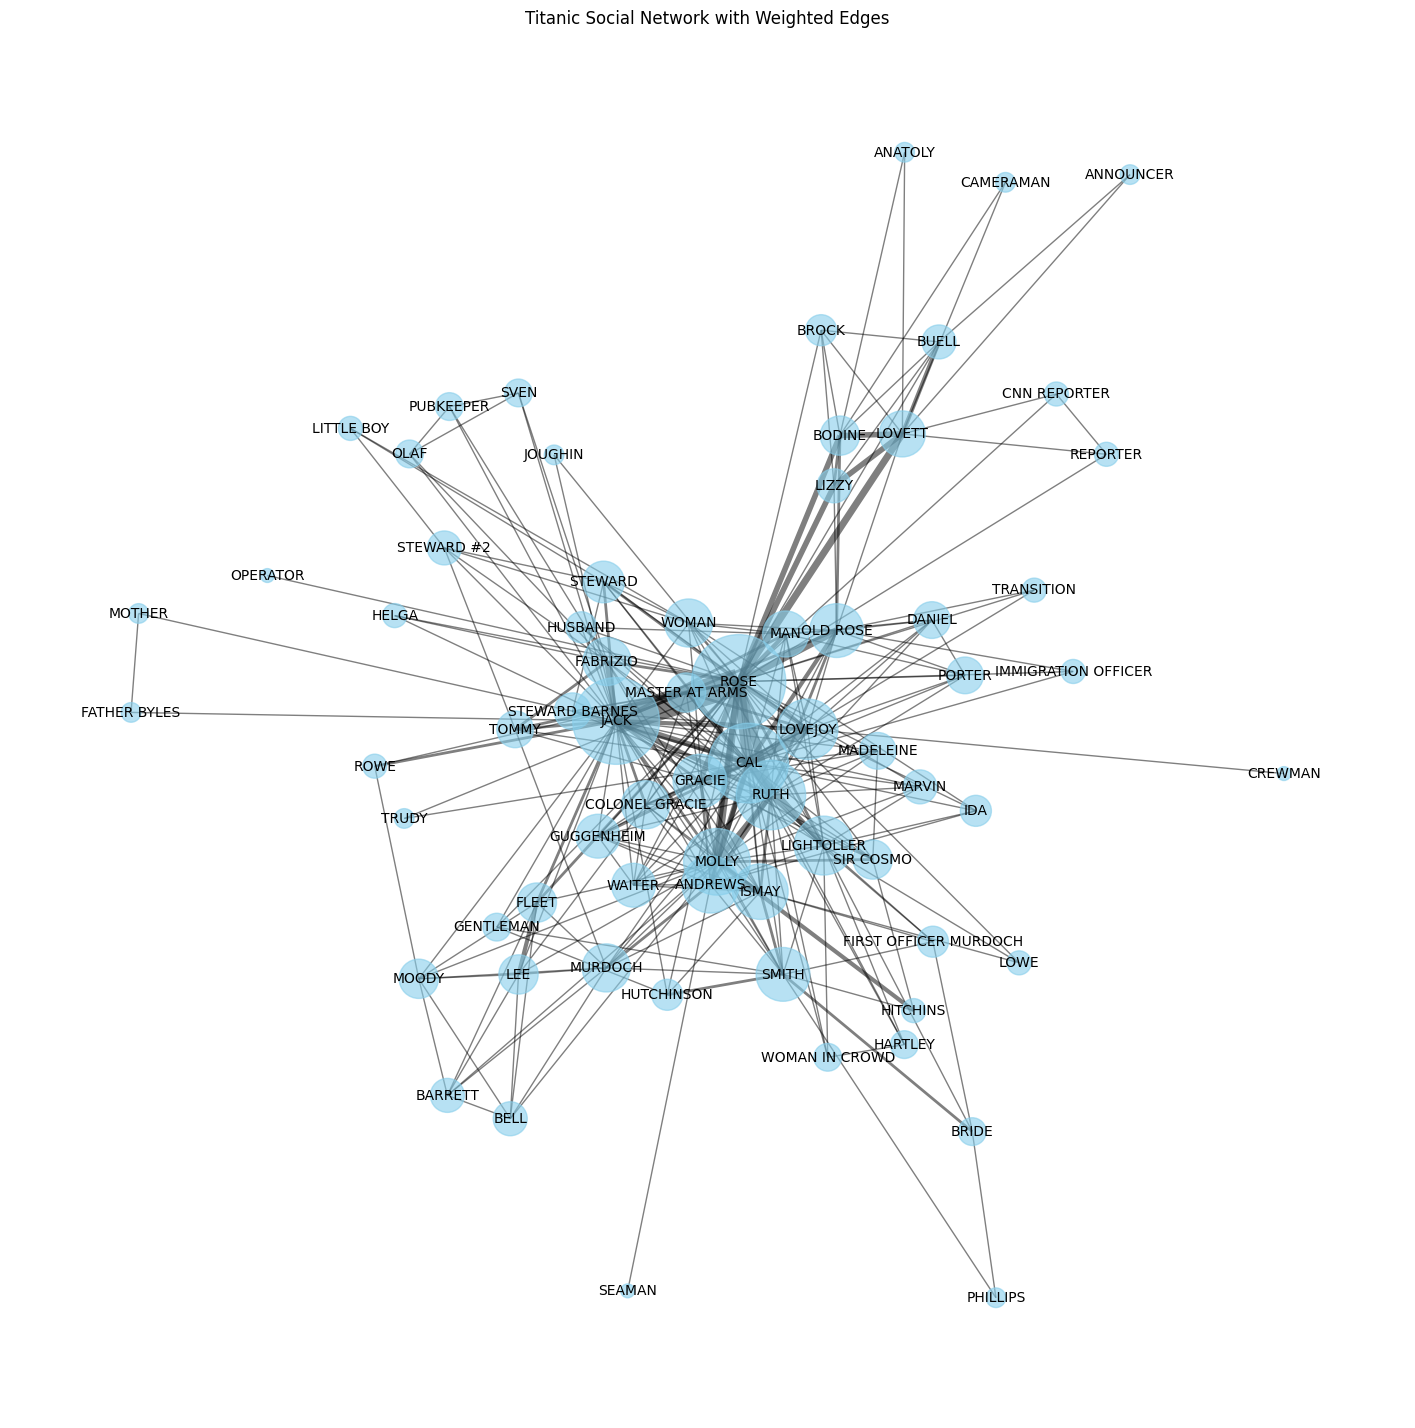

In [4]:
# Setting up the plot dimensions
plt.figure(figsize=(18, 18))

# Use the spring layout algorithm for positioning the nodes
pos = nx.spring_layout(G)

# Adjust node sizes based on their degrees
node_sizes = [v * 100 for v in dict(G.degree()).values()]

# Adjust edge widths based on their weights
edge_widths = [d['weight'] for _, _, d in G.edges(data=True)]

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.6)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=10)

plt.title("Titanic Social Network with Weighted Edges")
plt.axis("off")
plt.show()

### Graph Metrics

We found number of nodes, edges, average degree and density of the graph, using basic networkx functions.

In [10]:
#number of nodes
print("Number of nodes: ", G.number_of_nodes())

#number of edges
print("Number of edges: ", G.number_of_edges())

#average degree
print("Average degree: ", np.mean([d for n, d in G.degree()]))

#density
print("Density: ", nx.density(G))


Number of nodes:  70
Number of edges:  299
Average degree:  8.542857142857143
Density:  0.12380952380952381
